<h2>Subject: Computer Vision I


Group: 3

Authors: Angel Ontiveros, Lassi Laaksosaari

Assingment 4 </h2>

## Task 1

In [147]:
from skimage.io import imread
from skimage.segmentation import slic
from matplotlib import pyplot as plt
import numpy as np

In [148]:
label_image = imread('0001_label.png')
rgb_image = imread('0001_rgb.png')

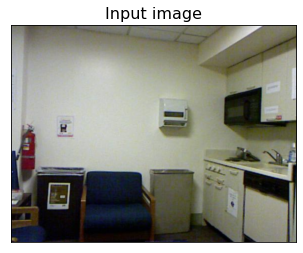

In [149]:
plt.title('Input image', fontsize=16)
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([])
plt.imshow(rgb_image)

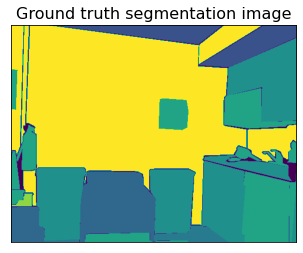

In [150]:
plt.title('Ground truth segmentation image', fontsize=16)
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([])
plt.imshow(label_image)

In [151]:
labels = np.unique(label_image)
labels = labels[labels != 0]
slic_img = slic(rgb_image, n_segments=len(labels), compactness=50)

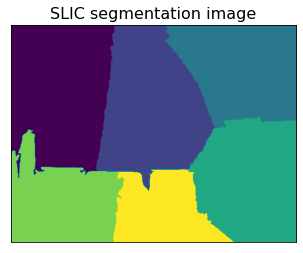

In [152]:
plt.title('SLIC segmentation image', fontsize=16)
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([])
plt.imshow(slic_img)

In [153]:
def calculate_avg_segmentation_error(label_image, slic_img, log=False):
    labels = np.unique(label_image)
    labels = labels[labels != 0]
    if log: print(f'ground truth labels without zero are: {labels}')
    if log: print(f'SLIC segmentation labels are: {np.unique(slic_img)}')
    error = 0
    for label in labels:
        error += calculate_segmentation_error(label, label_image, slic_img, log)
    avg_error = error / len(labels)
    return avg_error

In [154]:
def calculate_segmentation_error(label, label_image, slic_img, log=False):
    mask = label_image == label
    slic_label_region = slic_img[mask]
    slic_label_segments = np.unique(slic_label_region)
    if log: print(f'for label {label} following SLIC segmentations intercept: {slic_label_segments}')
    sum_slic_segments_area = 0
    label_area = np.sum(mask)
    for s in slic_label_segments:
        sum_slic_segments_area += np.sum(slic_img == s)
    undersegmentation_error = (sum_slic_segments_area - label_area)/ label_area
    if log: print(f'undersegmentation error for label {label} is {undersegmentation_error}')
    return undersegmentation_error

In [155]:
avg_segmentation_error = calculate_avg_segmentation_error(label_image, slic_img, log=True)

ground truth labels without zero are: [ 3  4  5  6  7 10 12]
SLIC segmentation labels are: [1 2 3 4 5 6]
for label 3 following SLIC segmentations intercept: [1 2 3]
undersegmentation error for label 3 is 9.078222285836972
for label 4 following SLIC segmentations intercept: [1 2 5 6]
undersegmentation error for label 4 is 6.548419930205506
for label 5 following SLIC segmentations intercept: [5 6]
undersegmentation error for label 5 is 17.7152027027027
for label 6 following SLIC segmentations intercept: [1 2 3 4 5 6]
undersegmentation error for label 6 is 3.7542372881355934
for label 7 following SLIC segmentations intercept: [1 2 3 4 5 6]
undersegmentation error for label 7 is 6.9278196981731535
for label 10 following SLIC segmentations intercept: [5]
undersegmentation error for label 10 is 53.343485617597295
for label 12 following SLIC segmentations intercept: [1 2 3 4 5 6]
undersegmentation error for label 12 is 1.1074083523212133


In [156]:
print(f'average segmentation error is: {avg_segmentation_error}')

average segmentation error is: 14.06782798213892


In [157]:
# Verify that segmentation error with ground truth image is zero
avg_segmentation_error = calculate_avg_segmentation_error(label_image, label_image, log=True)
print(f'average segmentation error using ground truth is: {avg_segmentation_error}')

ground truth labels without zero are: [ 3  4  5  6  7 10 12]
SLIC segmentation labels are: [ 0  3  4  5  6  7 10 12]
for label 3 following SLIC segmentations intercept: [3]
undersegmentation error for label 3 is 0.0
for label 4 following SLIC segmentations intercept: [4]
undersegmentation error for label 4 is 0.0
for label 5 following SLIC segmentations intercept: [5]
undersegmentation error for label 5 is 0.0
for label 6 following SLIC segmentations intercept: [6]
undersegmentation error for label 6 is 0.0
for label 7 following SLIC segmentations intercept: [7]
undersegmentation error for label 7 is 0.0
for label 10 following SLIC segmentations intercept: [10]
undersegmentation error for label 10 is 0.0
for label 12 following SLIC segmentations intercept: [12]
undersegmentation error for label 12 is 0.0
average segmentation error using ground truth is: 0.0


In [158]:
#See how segmentation error changes with SLIC n_segments
y = []
x = []
n_labels = len(labels)
for i in range(n_labels, n_labels*10, n_labels):
    slic_img = slic(rgb_image, n_segments=i, compactness=50)
    avg_segmentation_error = calculate_avg_segmentation_error(label_image, slic_img)
    x.append(i)
    y.append(avg_segmentation_error)

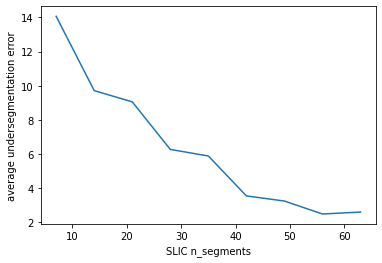

In [159]:
"""
As can be seen in the graph as the number of desired segments n for SLIC increases the average undersegmentation error decreases
This is because as segments get smaller by increasing n, the total area of segments that intercept with a ground truth segment
is smaller and approaches the area of the ground truth segment. Intuitively, there is less 'bleeding' as segments get smaller.
"""
plt.ylabel("average undersegmentation error")
plt.xlabel("SLIC n_segments")
plt.plot(x, y)